In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv1D, LSTM, MaxPooling1D, Flatten
from keras.optimizers import Adam

In [3]:
data = pd.read_csv('mouse_data.csv')

labels = data.iloc[:, -1].values  # Extract labels
data = data.drop(columns = 'label')
data = data.to_numpy()

x_data = data[:, :300]  # Extract 'x' coordinates
y_data = data[:, 300:]  # Extract 'y' coordinates

x = np.stack((x_data, y_data), axis=-1)
y = labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
print(np.shape(x))

(2000, 300, 2)


In [4]:
print(np.shape(x[0]))

(300, 2)


In [5]:
print(np.shape(x))

(2000, 300, 2)


In [6]:
print(np.shape(y))

(2000,)


In [4]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(300, 2)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
25/25 [==============================] - 6s 169ms/step - loss: 0.7044 - accuracy: 0.5969 - val_loss: 0.5597 - val_accuracy: 0.7450
Epoch 2/50
25/25 [==============================] - 4s 153ms/step - loss: 0.5359 - accuracy: 0.7325 - val_loss: 0.4995 - val_accuracy: 0.7550
Epoch 3/50
25/25 [==============================] - 4s 153ms/step - loss: 0.4883 - accuracy: 0.7569 - val_loss: 0.4620 - val_accuracy: 0.7625
Epoch 4/50
25/25 [==============================] - 4s 153ms/step - loss: 0.4400 - accuracy: 0.7894 - val_loss: 0.4226 - val_accuracy: 0.8125
Epoch 5/50
25/25 [==============================] - 4s 153ms/step - loss: 0.4083 - accuracy: 0.8188 - val_loss: 0.4127 - val_accuracy: 0.8225
Epoch 6/50
25/25 [==============================] - 4s 153ms/step - loss: 0.3664 - accuracy: 0.8319 - val_loss: 0.4269 - val_accuracy: 0.8150
Epoch 7/50
25/25 [==============================] - 4s 155ms/step - loss: 0.3501 - accuracy: 0.8431 - val_loss: 0.3569 - val_accuracy: 0.8425
Epoch 

In [5]:
from keras.models import load_model

model.save('cursor_model')  # Save the model

INFO:tensorflow:Assets written to: cursor_model/assets


INFO:tensorflow:Assets written to: cursor_model/assets


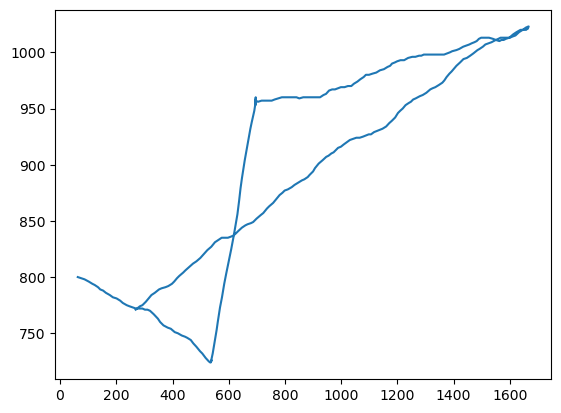

In [6]:
import matplotlib.pyplot as plt

arr = x[1003]
x_axis = []
y_axis = []
for i in arr:
    x_axis.append(i[0])
    y_axis.append(i[1])

plt.plot(x_axis, y_axis)

In [7]:
single_row = x_test[1].reshape(1, 300, 2)
prediction = model.predict(single_row)
print(prediction)

1/1 [==============================] - 0s 311ms/step
[[0.07669341]]
